# Fitting a Model With Data Augmentation

In [1]:
import os
print(os.listdir("C:\\Users\\Selasie\\Desktop\\AI\\Sign Language\\input\\asl-alphabet\\asl_alphabet_train"))

['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [2]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 64

data_generator_with_aug = ImageDataGenerator(
                                    samplewise_center=True, 
                                    samplewise_std_normalization=True,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   validation_split = 0.1, rotation_range = 10,
                                   zoom_range = 0.1)


train_generator = data_generator_with_aug.flow_from_directory(
        'C:\\Users\\Selasie\\Desktop\\AI\\Sign Language\\input\\asl-alphabet\\asl_alphabet_train',
        target_size=(image_size, image_size),
        batch_size=64,
        class_mode='categorical', subset = 'training')

validation_generator = data_generator_with_aug.flow_from_directory(
        'C:\\Users\\Selasie\\Desktop\\AI\\Sign Language\\input\\asl-alphabet\\asl_alphabet_train',
        target_size=(image_size, image_size),
        class_mode='categorical', subset = 'validation')



Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [3]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, Dropout

num_classes = 29

my_model = Sequential()
conv_test = Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=(image_size, image_size, 3))
my_model.add(conv_test)
my_model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
my_model.add(Flatten())
my_model.add(Dropout(0.5))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(num_classes, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

W0913 03:29:39.783428  7712 deprecation.py:506] From C:\Users\Selasie\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
my_model.fit_generator(
        train_generator,
        steps_per_epoch=20,
        epochs=300,
        validation_data=validation_generator, validation_steps = 10)

Epoch 1/300
20/20 [==============================] - 69s 3s/step - loss: 3.3734 - acc: 0.0297 - val_loss: 3.3681 - val_acc: 0.0312
Epoch 2/300
20/20 [==============================] - 66s 3s/step - loss: 3.3689 - acc: 0.0312 - val_loss: 3.3673 - val_acc: 0.0281
Epoch 3/300
20/20 [==============================] - 67s 3s/step - loss: 3.3647 - acc: 0.0320 - val_loss: 3.3641 - val_acc: 0.0437
Epoch 4/300
20/20 [==============================] - 119s 6s/step - loss: 3.3432 - acc: 0.0484 - val_loss: 3.2937 - val_acc: 0.0406
Epoch 5/300
20/20 [==============================] - 66s 3s/step - loss: 3.3585 - acc: 0.0336 - val_loss: 3.3483 - val_acc: 0.0406
Epoch 6/300
20/20 [==============================] - 67s 3s/step - loss: 3.2775 - acc: 0.0719 - val_loss: 3.2305 - val_acc: 0.0719
Epoch 7/300
20/20 [==============================] - 71s 4s/step - loss: 3.2160 - acc: 0.1180 - val_loss: 3.2744 - val_acc: 0.0781
Epoch 8/300
20/20 [==============================] - 78s 4s/step - loss: 3.1247 - 

20/20 [==============================] - 69s 3s/step - loss: 0.7722 - acc: 0.7242 - val_loss: 0.8705 - val_acc: 0.7375
Epoch 64/300
20/20 [==============================] - 71s 4s/step - loss: 0.7930 - acc: 0.7492 - val_loss: 0.7956 - val_acc: 0.7594
Epoch 65/300
20/20 [==============================] - 68s 3s/step - loss: 0.7056 - acc: 0.7656 - val_loss: 0.7801 - val_acc: 0.7281
Epoch 66/300
20/20 [==============================] - 68s 3s/step - loss: 0.6761 - acc: 0.7719 - val_loss: 0.7580 - val_acc: 0.7437
Epoch 67/300
20/20 [==============================] - 68s 3s/step - loss: 0.6907 - acc: 0.7727 - val_loss: 0.7522 - val_acc: 0.7437
Epoch 68/300
20/20 [==============================] - 68s 3s/step - loss: 0.6319 - acc: 0.7930 - val_loss: 0.8293 - val_acc: 0.7156
Epoch 69/300
20/20 [==============================] - 71s 4s/step - loss: 0.6305 - acc: 0.7844 - val_loss: 0.8583 - val_acc: 0.7219
Epoch 70/300
20/20 [==============================] - 69s 3s/step - loss: 0.6154 - acc: 0

Epoch 125/300
20/20 [==============================] - 29s 1s/step - loss: 0.4612 - acc: 0.8359 - val_loss: 0.5253 - val_acc: 0.8250
Epoch 126/300
20/20 [==============================] - 28s 1s/step - loss: 0.4395 - acc: 0.8531 - val_loss: 0.4715 - val_acc: 0.8500
Epoch 127/300
20/20 [==============================] - 28s 1s/step - loss: 0.4410 - acc: 0.8562 - val_loss: 0.5138 - val_acc: 0.8250
Epoch 128/300
20/20 [==============================] - 28s 1s/step - loss: 0.4834 - acc: 0.8320 - val_loss: 0.7017 - val_acc: 0.7969
Epoch 129/300
20/20 [==============================] - 28s 1s/step - loss: 0.4525 - acc: 0.8641 - val_loss: 0.5966 - val_acc: 0.8219
Epoch 130/300
20/20 [==============================] - 29s 1s/step - loss: 0.4784 - acc: 0.8375 - val_loss: 0.6394 - val_acc: 0.8125
Epoch 131/300
20/20 [==============================] - 32s 2s/step - loss: 0.4143 - acc: 0.8625 - val_loss: 0.5570 - val_acc: 0.8313
Epoch 132/300
20/20 [==============================] - 32s 2s/step - 

20/20 [==============================] - 33s 2s/step - loss: 0.3366 - acc: 0.8852 - val_loss: 0.5300 - val_acc: 0.8250
Epoch 187/300
20/20 [==============================] - 33s 2s/step - loss: 0.3382 - acc: 0.8813 - val_loss: 0.5074 - val_acc: 0.8438
Epoch 188/300
20/20 [==============================] - 33s 2s/step - loss: 0.3909 - acc: 0.8727 - val_loss: 0.5514 - val_acc: 0.8062
Epoch 189/300
20/20 [==============================] - 33s 2s/step - loss: 0.3694 - acc: 0.8781 - val_loss: 0.4095 - val_acc: 0.8906
Epoch 190/300
20/20 [==============================] - 33s 2s/step - loss: 0.3713 - acc: 0.8828 - val_loss: 0.4686 - val_acc: 0.8125
Epoch 191/300
20/20 [==============================] - 33s 2s/step - loss: 0.3183 - acc: 0.8898 - val_loss: 0.5886 - val_acc: 0.8344
Epoch 192/300
20/20 [==============================] - 33s 2s/step - loss: 0.3528 - acc: 0.8859 - val_loss: 0.4950 - val_acc: 0.8406
Epoch 193/300
20/20 [==============================] - 33s 2s/step - loss: 0.3149 -

Epoch 248/300
20/20 [==============================] - 35s 2s/step - loss: 0.3355 - acc: 0.8961 - val_loss: 0.4122 - val_acc: 0.8719
Epoch 249/300
20/20 [==============================] - 34s 2s/step - loss: 0.2910 - acc: 0.9000 - val_loss: 0.3410 - val_acc: 0.8906
Epoch 250/300
20/20 [==============================] - 35s 2s/step - loss: 0.2375 - acc: 0.9164 - val_loss: 0.4365 - val_acc: 0.8500
Epoch 251/300
20/20 [==============================] - 34s 2s/step - loss: 0.2897 - acc: 0.9062 - val_loss: 0.3671 - val_acc: 0.8875
Epoch 252/300
20/20 [==============================] - 47s 2s/step - loss: 0.3355 - acc: 0.8828 - val_loss: 0.4261 - val_acc: 0.8500
Epoch 253/300
20/20 [==============================] - 56s 3s/step - loss: 0.3195 - acc: 0.8977 - val_loss: 0.4571 - val_acc: 0.8562
Epoch 254/300
20/20 [==============================] - 72s 4s/step - loss: 0.2842 - acc: 0.9109 - val_loss: 0.5794 - val_acc: 0.8062
Epoch 255/300
20/20 [==============================] - 73s 4s/step - 

In [9]:
my_model.save("trust.hdf5")

W0913 09:38:32.218723  7712 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


64


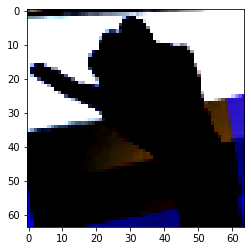

W0913 09:38:32.722511  7712 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[5.65644059e-12 5.01946540e-10 3.80307020e-16 ... 9.17164478e-09
  3.14148429e-10 3.43598208e-06]
 [3.67804273e-06 1.80749521e-06 6.33428863e-05 ... 4.69963597e-05
  1.54167151e-06 9.92679238e-01]
 [9.99968886e-01 1.84702009e-09 7.98167549e-14 ... 4.51563293e-14
  1.77671669e-12 9.46570502e-17]
 ...
 [9.99996901e-01 7.74481499e-13 1.49670589e-17 ... 4.65298566e-18
  5.24008621e-16 1.76205992e-22]
 [1.77005272e-10 1.29252099e-17 1.81058922e-12 ... 7.34084959e-10
  8.44868620e-10 2.34270780e-14]
 [4.01188770e-15 4.08770774e-15 1.00909656e-10 ... 4.72851021e-08
  9.09216365e-12 9.99998689e-01]]
64


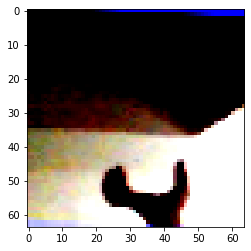

[[5.65644059e-12 5.01946540e-10 3.80307020e-16 ... 9.17164478e-09
  3.14148429e-10 3.43598208e-06]
 [3.67804273e-06 1.80749521e-06 6.33428863e-05 ... 4.69963597e-05
  1.54167151e-06 9.92679238e-01]
 [9.99968886e-01 1.84702009e-09 7.98167549e-14 ... 4.51563293e-14
  1.77671669e-12 9.46570502e-17]
 ...
 [9.99996901e-01 7.74481499e-13 1.49670589e-17 ... 4.65298566e-18
  5.24008621e-16 1.76205992e-22]
 [1.77005272e-10 1.29252099e-17 1.81058922e-12 ... 7.34084959e-10
  8.44868620e-10 2.34270780e-14]
 [4.01188770e-15 4.08770774e-15 1.00909656e-10 ... 4.72851021e-08
  9.09216365e-12 9.99998689e-01]]


In [14]:
import matplotlib.pyplot as plt

x,y = next(train_generator)
for i in range(0,2):
    print(len(x[0][0]))
    image = x[i]
    plt.imshow(image)
    plt.show()
    print(my_model.predict([x]))